<a href="https://colab.research.google.com/github/magomeda228/Colab_Google_ML_H-W/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zdfvberfew","key":"e7c65bd161c0a2a6514d1895a9ab3875"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle --version

Kaggle API 1.6.17


In [5]:
!kaggle competitions download -c nyc-taxi-trip-duration

 97% 83.0M/85.8M [00:01<00:00, 82.2MB/s]
100% 85.8M/85.8M [00:01<00:00, 76.3MB/s]


In [6]:
!unzip nyc-taxi-trip-duration.zip

Archive:  nyc-taxi-trip-duration.zip
  inflating: sample_submission.zip   
  inflating: test.zip                
  inflating: train.zip               


In [7]:
!unzip train.zip

Archive:  train.zip
  inflating: train.csv               


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
train = pd.read_csv('train.csv')

In [10]:
train_df = pd.DataFrame(train)

In [11]:
train_df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [12]:
train_df = train_df.drop(columns='dropoff_datetime')
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])

In [13]:
train_df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [14]:
Y = train_df['trip_duration']
Y

,trip_duration
0,455
1,663
2,2124
3,429
4,435
...,...
1458639,778
1458640,655
1458641,764
1458642,373


In [15]:
train_df['trip_duration'].describe()

,trip_duration
count,1.458644e+06
mean,9.594923e+02
std,5.237432e+03
min,1.000000e+00
25%,3.970000e+02
50%,6.620000e+02
75%,1.075000e+03
max,3.526282e+06


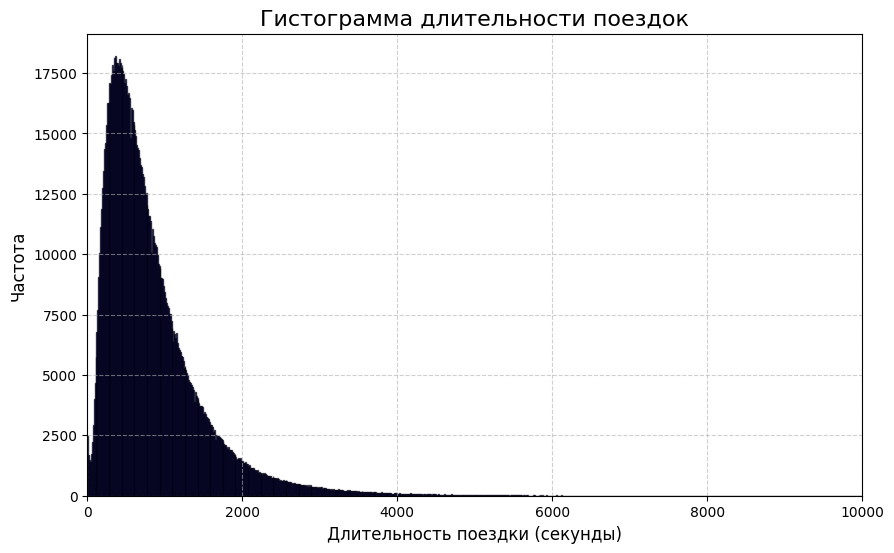

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['trip_duration'], bins='auto',  color='blue', edgecolor='black', alpha=0.7)
plt.title('Гистограмма длительности поездок', fontsize=16)
plt.xlim(0,1e4)
plt.xlabel('Длительность поездки (секунды)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
train_df['log_trip_duration'] = np.log1p(train_df['trip_duration'])
train_df.drop(columns='trip_duration')

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


In [ ]:
train_df['log_trip_duration'].describe()

,log_trip_duration
count,1.458644e+06
mean,6.466978e+00
std,7.957595e-01
min,6.931472e-01
25%,5.986452e+00
50%,6.496775e+00
75%,6.981006e+00
max,1.507575e+01


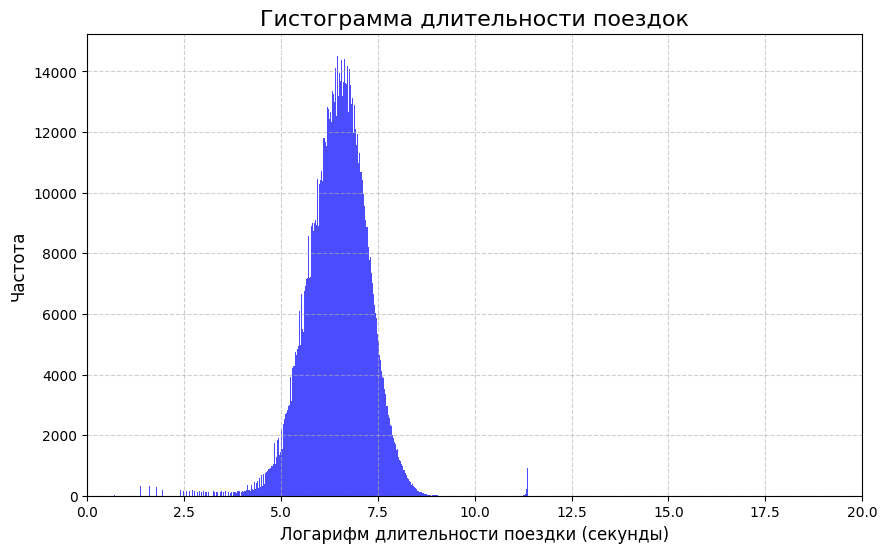

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(train_df['log_trip_duration'], bins='auto', color='blue', alpha=0.7)
plt.xlim(0,20)
plt.title('Гистограмма длительности поездок', fontsize=16)
plt.xlabel('Логарифм длительности поездки (секунды)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
log_mean = train_df['log_trip_duration'].mean()
y_pred_const = np.full_like(train_df['log_trip_duration'], log_mean)
mse_const = mean_squared_error(train_df['log_trip_duration'], y_pred_const)
mse_const

0.6332327625405553

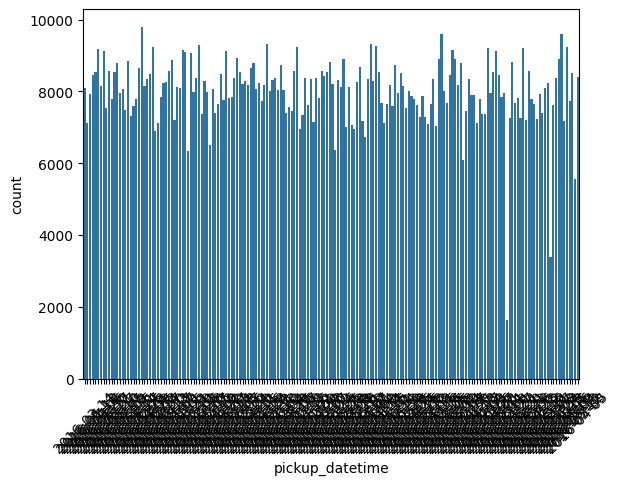

In [ ]:
sns.countplot(x=train_df['pickup_datetime'].dt.date)
plt.xticks(rotation=45)
plt.show()

In [ ]:
grouped = train_df.groupby('date').count().sort_values(by='id').head(2).rename(columns={'id':'count'})
grouped['count']

,count
date,
2016-01-23,1648
2016-01-24,3383


In [16]:
train_df['weekday']=train_df['pickup_datetime'].dt.weekday

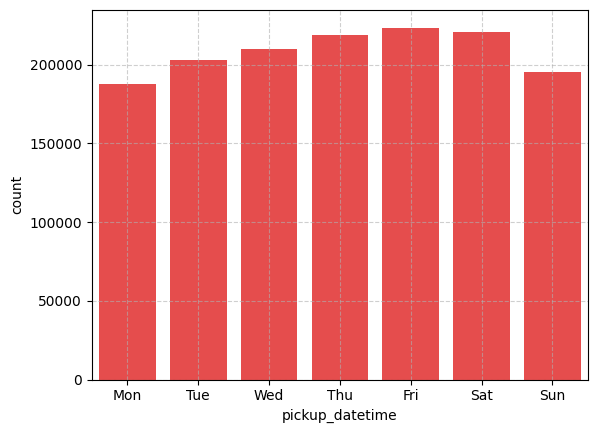

In [17]:
sns.countplot(x=train_df['pickup_datetime'].dt.weekday, color='red', alpha=0.8)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, linestyle='--', alpha=0.6)

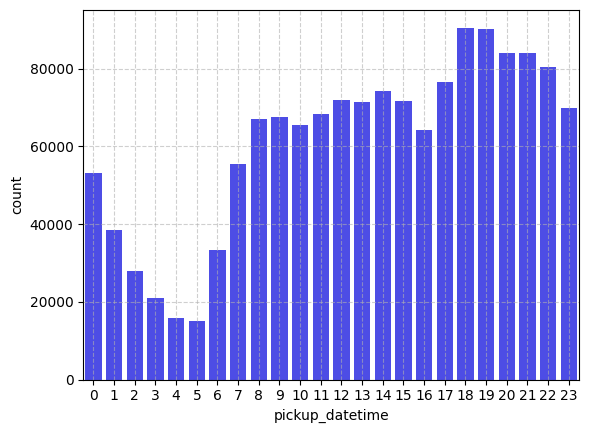

In [18]:
sns.countplot(x=train_df['pickup_datetime'].dt.hour, color='blue', alpha=0.8)
plt.grid(True, linestyle='--', alpha=0.6)

In [19]:
train_df['pickup_datetime'].dt.month

,pickup_datetime
0,3
1,6
2,1
3,4
4,3
...,...
1458639,4
1458640,1
1458641,4
1458642,1


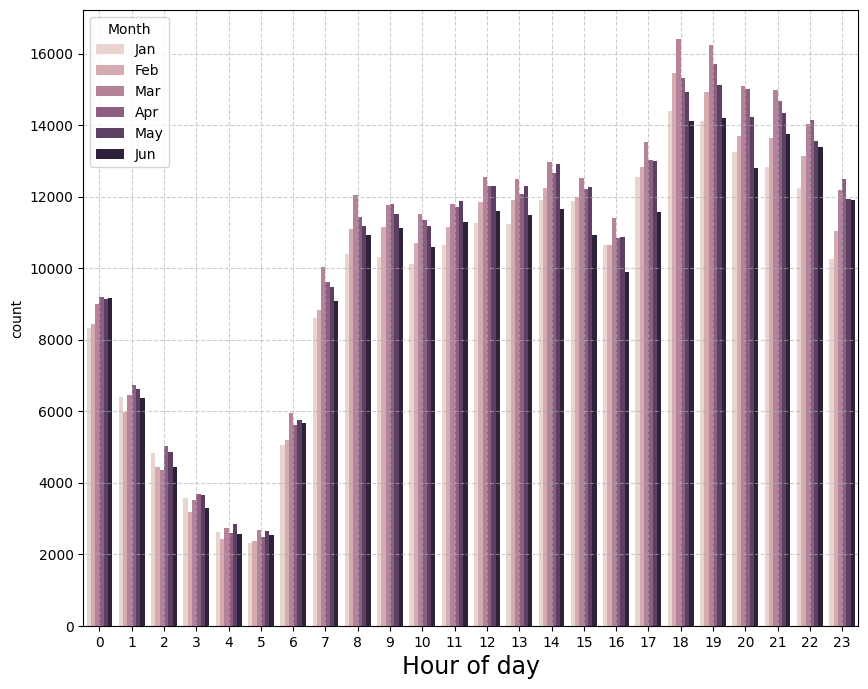

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x=train_df['pickup_datetime'].dt.hour, hue=train_df['pickup_datetime'].dt.month, data=train_df)
plt.legend(title='Month', labels=['Jan','Feb','Mar','Apr','May','Jun'])
plt.xlabel('Hour of day',size=17)
plt.grid(True, linestyle='--', alpha=0.6)

Text(0.5, 0, 'Hour of day')

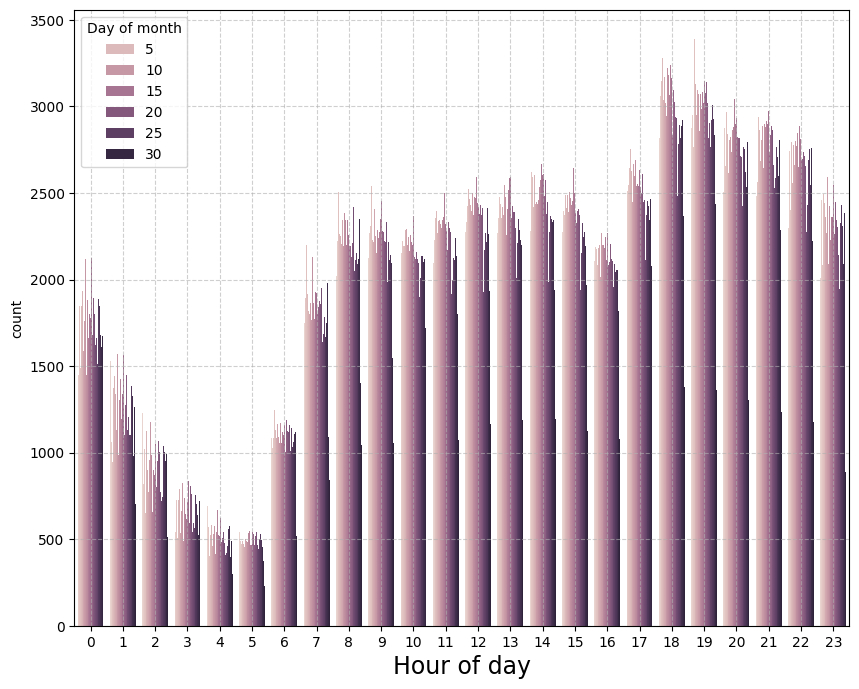

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x=train_df['pickup_datetime'].dt.hour,hue=train_df['pickup_datetime'].dt.day)
plt.grid(True,linestyle='--',alpha=0.6)
plt.legend(title='Day of month')
plt.xlabel('Hour of day',size=17)

In [34]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(train_df, test_size=0.3)


In [35]:
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday
9861,id3958231,2,2016-04-24 19:36:24,1,-73.963791,40.757084,-73.947159,40.779881,N,305,6
489212,id1764799,2,2016-02-07 01:52:22,1,-73.983307,40.729084,-73.999985,40.728596,N,1710,6
851305,id1875437,1,2016-06-23 16:17:26,1,-73.980171,40.762493,-73.980171,40.762493,N,544,3
109203,id0081079,2,2016-03-25 09:56:33,1,-73.994164,40.727638,-74.010338,40.711491,N,676,4
1416304,id1930047,2,2016-06-11 18:07:23,1,-73.978111,40.748798,-73.875214,40.770370,N,837,5
...,...,...,...,...,...,...,...,...,...,...,...
118018,id3214023,1,2016-01-09 17:58:33,1,-73.953682,40.767056,-73.953468,40.779621,N,332,5
815108,id0225910,2,2016-03-13 22:17:55,3,-73.788818,40.646820,-73.996361,40.686001,N,2799,6
566644,id1722170,1,2016-03-03 16:11:30,1,-73.982597,40.740013,-73.991058,40.770206,N,1492,3
980005,id0694350,1,2016-02-09 11:49:58,1,-73.980255,40.739231,-73.983650,40.748531,N,649,1


In [39]:
df_train['trip_duration']

,trip_duration
9861,305
489212,1710
851305,544
109203,676
1416304,837
...,...
118018,332
815108,2799
566644,1492
980005,649


In [144]:
#df_train_day = pd.DataFrame()
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['weekday'] =df_train['pickup_datetime'].dt.weekday
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train['day_month'] = df_train['pickup_datetime'].dt.day
df_train['day_year'] = df_train['pickup_datetime'].dt.dayofyear
df_train['trip_duration'] = df_train['trip_duration']

In [147]:
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour,day_month,day_year
9861,id3958231,2,2016-04-24 19:36:24,1,-73.963791,40.757084,-73.947159,40.779881,N,305,6,19,24,115
489212,id1764799,2,2016-02-07 01:52:22,1,-73.983307,40.729084,-73.999985,40.728596,N,1710,6,1,7,38
851305,id1875437,1,2016-06-23 16:17:26,1,-73.980171,40.762493,-73.980171,40.762493,N,544,3,16,23,175
109203,id0081079,2,2016-03-25 09:56:33,1,-73.994164,40.727638,-74.010338,40.711491,N,676,4,9,25,85
1416304,id1930047,2,2016-06-11 18:07:23,1,-73.978111,40.748798,-73.875214,40.770370,N,837,5,18,11,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118018,id3214023,1,2016-01-09 17:58:33,1,-73.953682,40.767056,-73.953468,40.779621,N,332,5,17,9,9
815108,id0225910,2,2016-03-13 22:17:55,3,-73.788818,40.646820,-73.996361,40.686001,N,2799,6,22,13,73
566644,id1722170,1,2016-03-03 16:11:30,1,-73.982597,40.740013,-73.991058,40.770206,N,1492,3,16,3,63
980005,id0694350,1,2016-02-09 11:49:58,1,-73.980255,40.739231,-73.983650,40.748531,N,649,1,11,9,40


In [157]:
df_train.groupby('weekday')['trip_duration'].mean()
df_train.groupby('hour')['trip_duration'].mean()


,trip_duration
hour,
0,900.166934
1,898.191069
2,868.138212
3,852.254296
4,911.793268
5,808.110504
6,741.055541
7,841.930986
8,934.096525


In [82]:
df_train_day.index

Index([0, 1, 2, 3, 4, 5, 6], dtype='int32', name='weekday')

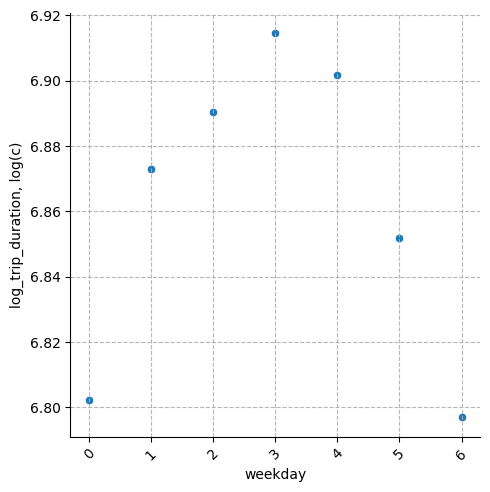

In [162]:
sns.relplot(x=df_train.groupby('weekday')['trip_duration'].mean().index, y=np.log(df_train.groupby('weekday')['trip_duration'].mean()))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha =0.9)
plt.ylabel('log_trip_duration, log(c)')
plt.show()

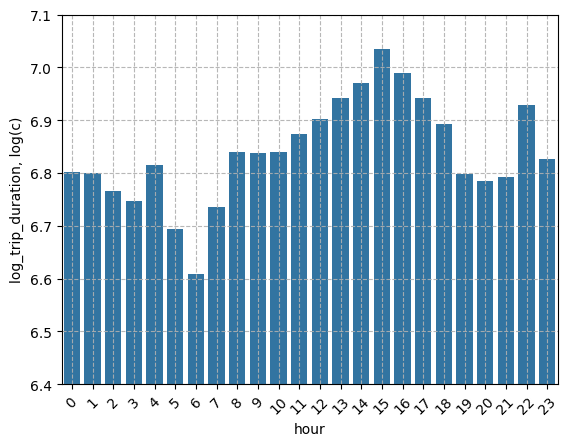

In [163]:
sns.barplot(x=df_train_day.groupby('hour')['trip_duration'].mean().index, y=np.log(df_train_day.groupby('hour')['trip_duration'].mean()))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha =0.9)
plt.ylabel('log_trip_duration, log(c)')
plt.ylim(6.4,7.1)
plt.show()

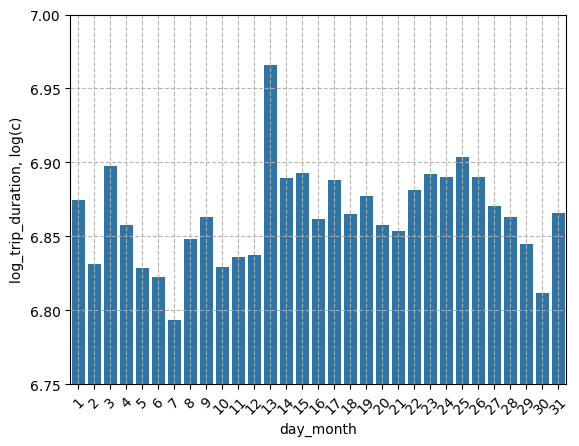

In [164]:
sns.barplot(x=df_train_day.groupby('day_month')['trip_duration'].mean().index, y=np.log(df_train_day.groupby('day_month')['trip_duration'].mean()))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha =0.9)
plt.ylabel('log_trip_duration, log(c)')
plt.ylim(6.75,7.0)
plt.show()

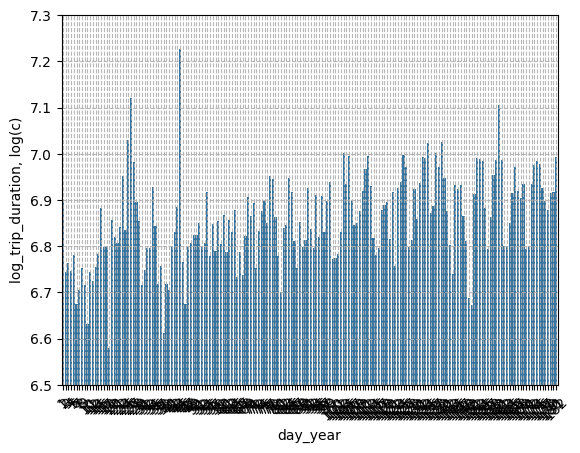

In [165]:
sns.barplot(x=df_train_day.groupby('day_year')['trip_duration'].mean().index, y=np.log(df_train_day.groupby('day_year')['trip_duration'].mean()))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha =0.9)
plt.ylabel('log_trip_duration, log(c)')
plt.ylim(6.5,7.3)
plt.show()

In [202]:
numeric_features = ['hour','day_year','day_month','weekday']
unumeric_features = df_train.select_dtypes([object]).columns

In [207]:
df_train[numeric_features].isna().sum()

,0
hour,0
day_year,0
day_month,0
weekday,0


In [208]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

scaler = StandardScaler()
X_train = df_train[numeric_features + unumeric_features.tolist()]
Y_train = df_train['trip_duration']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, unumeric_features)
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
model.fit(X_train, Y_train)
print(f"R^2 на обучающих данных: {model.score(X_train, Y_train):.4f}")

R^2 на обучающих данных: 0.7500
